In [129]:
import matplotlib.pyplot as plt
import numpy as np

import qp
import qp.metrics

"""
When producing random variates from distributions contained in an Ensemble object
rvs_size specifies the number of variates to produce, and random_state ensures
reproducibility for this notebook.
"""
rvs_size = 100
random_state = 42

The following line produces an Ensemble object that contains 11 normal distributions. The mean and sigma are different for each.

In [130]:
number_of_distributions = 3

locs = 2* (np.random.uniform(size=(number_of_distributions,1)))
scales = 1 + 0.2*(np.random.uniform(size=(number_of_distributions,1)))
ens_r_1 = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=locs, scale=scales))

print("Number of distributions in ens_r_1: " + str(ens_r_1.npdf))

locs = 2* (np.random.uniform(size=(number_of_distributions,1)))
scales = 1 + 0.2*(np.random.uniform(size=(number_of_distributions,1)))
ens_r_2 = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=locs, scale=scales))

print("Number of distributions in ens_r_2: " + str(ens_r_2.npdf))

Number of distributions in ens_r_1: 3
Number of distributions in ens_r_2: 3


Calculate the Anderson-Darling statistic between each pair of distributions in two Ensembles. 

In [131]:
output = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )

Plot the PDFs along with the resulting Anderson-Darling statistics

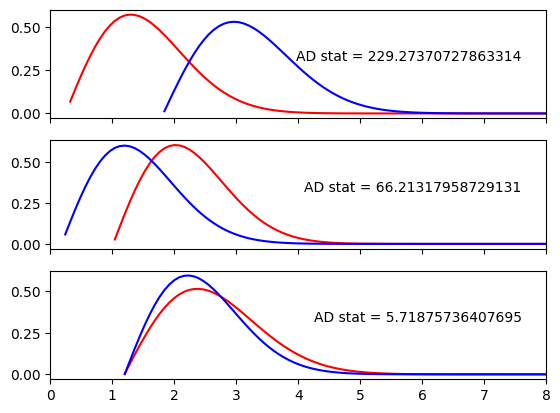

In [133]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.set_xlim([0,8])

ax0.text(0.95, 0.5, f'AD stat = {output[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
_ = qp.plotting.plot_native(ens_r_1[0], axes=ax0, color='red')
_ = qp.plotting.plot_native(ens_r_2[0], axes=ax0, color='blue')

ax1.text(0.95, 0.5, f'AD stat = {output[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
_ = qp.plotting.plot_native(ens_r_1[1], axes=ax1, color='red')
_ = qp.plotting.plot_native(ens_r_2[1], axes=ax1, color='blue')

ax2.text(0.95, 0.5, f'AD stat = {output[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
_ = qp.plotting.plot_native(ens_r_1[2], axes=ax2, color='red')
_ = qp.plotting.plot_native(ens_r_2[2], axes=ax2, color='blue')



Similarly Cramer-von Mises and Kolmogorov-Smirnov statistics can be calculated.

In [134]:
cvm_output = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='cvm',
            num_samples=rvs_size,
            _random_state=random_state
        )

ks_output = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='ks',
            num_samples=rvs_size,
            _random_state=random_state
        )

/Users/drew/opt/miniconda3/envs/qp_issue_25/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:7220: RuntimeWarning: invalid value encountered in log
  return np.log(r) - 0.5 * r * r


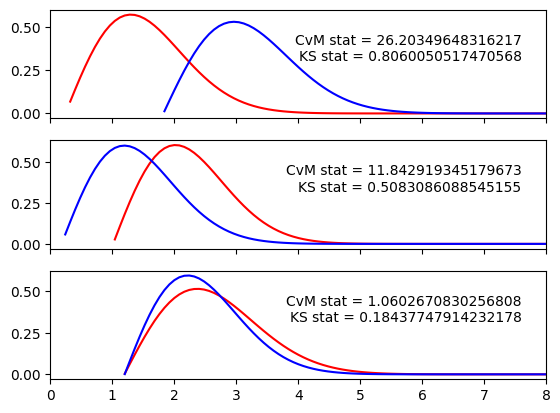

In [138]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.set_xlim([0,8])

ax0.text(0.95, 0.65, f'CvM stat = {cvm_output[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
ax0.text(0.95, 0.5, f'KS stat = {ks_output[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
_ = qp.plotting.plot_native(ens_r_1[0], axes=ax0, color='red')
_ = qp.plotting.plot_native(ens_r_2[0], axes=ax0, color='blue')

ax1.text(0.95, 0.65, f'CvM stat = {cvm_output[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
ax1.text(0.95, 0.5, f'KS stat = {ks_output[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
_ = qp.plotting.plot_native(ens_r_1[1], axes=ax1, color='red')
_ = qp.plotting.plot_native(ens_r_2[1], axes=ax1, color='blue')

ax2.text(0.95, 0.65, f'CvM stat = {cvm_output[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
ax2.text(0.95, 0.5, f'KS stat = {ks_output[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
_ = qp.plotting.plot_native(ens_r_1[2], axes=ax2, color='red')
_ = qp.plotting.plot_native(ens_r_2[2], axes=ax2, color='blue')

In addition to Ensemble vs Ensemble pair-wise calculations, we can compare an Ensemble containing N distributions against an Ensemble containing 1 distribution. We'll create an Ensemble containing a single distribution, and then calculate the various statistics.

In [140]:
locs = 2* (np.random.uniform(size=(1,1)))
scales = 1 + 0.2*(np.random.uniform(size=(1,1)))
ens_r_single = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=locs, scale=scales))

print("Number of distributions in ens_r_2: " + str(ens_r_single.npdf))

Number of distributions in ens_r_2: 1


In [153]:
ad_output_vs_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_single,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )

cvm_output_vs_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_single,
            fit_metric='cvm',
            num_samples=rvs_size,
            _random_state=random_state
        )

ks_output_vs_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_single,
            fit_metric='ks',
            num_samples=rvs_size,
            _random_state=random_state
        )

/Users/drew/opt/miniconda3/envs/qp_issue_25/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:7220: RuntimeWarning: invalid value encountered in log
  return np.log(r) - 0.5 * r * r


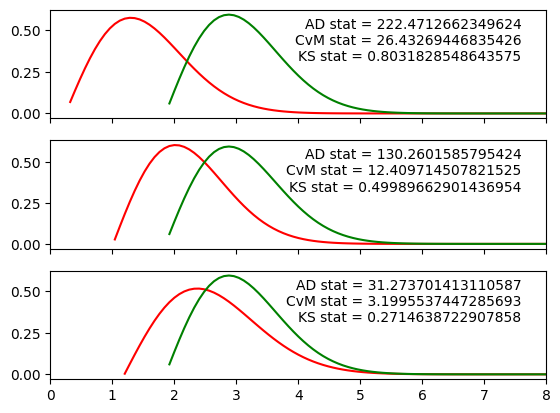

In [154]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.set_xlim([0,8])

ax0.text(0.95, 0.8, f'AD stat = {ad_output_vs_1[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
ax0.text(0.95, 0.65, f'CvM stat = {cvm_output_vs_1[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
ax0.text(0.95, 0.5, f'KS stat = {ks_output_vs_1[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)

_ = qp.plotting.plot_native(ens_r_1[0], axes=ax0, color='red')
_ = qp.plotting.plot_native(ens_r_single, axes=ax0, color='green')

ax1.text(0.95, 0.8, f'AD stat = {ad_output_vs_1[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
ax1.text(0.95, 0.65, f'CvM stat = {cvm_output_vs_1[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
ax1.text(0.95, 0.5, f'KS stat = {ks_output_vs_1[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
_ = qp.plotting.plot_native(ens_r_1[1], axes=ax1, color='red')
_ = qp.plotting.plot_native(ens_r_single, axes=ax1, color='green')

ax2.text(0.95, 0.8, f'AD stat = {ad_output_vs_1[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
ax2.text(0.95, 0.65, f'CvM stat = {cvm_output_vs_1[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
ax2.text(0.95, 0.5, f'KS stat = {ks_output_vs_1[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
_ = qp.plotting.plot_native(ens_r_1[2], axes=ax2, color='red')
_ = qp.plotting.plot_native(ens_r_single, axes=ax2, color='green')

Also note that because we are sampling from one Ensemble, the calculation is not symmetric. For instance before we calculated 

In [147]:
output_1_then_2 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )


# Note that the order of the input variables has changed from ens_r_1, ens_r_2 to ens_r_2, ens_r_1
output_2_then_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_2,
            ens_r_1,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )

If the calculation were symmetric, we would expect the difference between the two outputs to be approximately [0,0,0]

In [151]:
print(output_1_then_2 - output_2_then_1)

[ 30.36571272 -58.80397731   3.51851017]
